In [ ]:
import numpy as np
import pandas as pd
import random
import time
import matplotlib.pyplot as plt

In [ ]:
#Feature extraction is to transform image into list of features using grid technique 
def feature_extraction(x_path,y_path):
    x_array=[]#2d list for extracted images
    y_array=[]# list for y labels
    trainlabel_file=open(y_path,"r")

    for line in trainlabel_file:
        y_array.append(int(line.rstrip()))
    xfile=open(x_path,"r")
    num_lines=0
    xfile_list=[]
    for line in xfile:
      num_lines=num_lines+1
      xfile_list.append(line)
    
    for i in range(0,num_lines,70):
        xi_feature=[]
        row_count=i
        for j in range(7): # Taking 10x10 grid
            ind_col_count=0
            white_count=0
            col=0
            while(col<6):
                white_count=0
                old_colcount=ind_col_count
                for k in range(row_count,row_count+10):
                    ind_col_count=old_colcount
                    for l in range (old_colcount,old_colcount+10):
                        if(xfile_list[k][l]==' '):
                            ind_col_count=ind_col_count+1
                            white_count=white_count+1 #Taking white pixels into consideration
                        else:
                            ind_col_count=ind_col_count+1
                xi_feature.append(round((white_count/100)*10))
                col=col+1
            row_count=row_count+10
        x_array.append(xi_feature)
    return x_array,y_array
                    


In [ ]:
X_features,Y_labels=feature_extraction("/Users/rohithgummadi/Desktop/AI_Project/facedata/facedatatrain","/Users/rohithgummadi/Desktop/AI_Project/facedata/facedatatrainlabels")

In [ ]:
print(len(X_features))

451


In [ ]:
print(len(X_features[0]))

42


In [ ]:
def calc_class_prior(Ytrain_labels): # To calculate prior probabilities of output feature classes based on training data
   class_priors={}
   uni_Ytrain_labels=[]
   Ytrain_labels_size=len(Ytrain_labels)
   for i in Ytrain_labels:
      if i not in uni_Ytrain_labels:
         uni_Ytrain_labels.append(i)
   for outcome in uni_Ytrain_labels:
      outcome_count=0
      for j in Ytrain_labels:
         if(j==outcome):
            outcome_count=outcome_count+1
      class_priors[outcome]=outcome_count/Ytrain_labels_size
   return class_priors
    

In [ ]:
class_priors=calc_class_prior(Y_labels)
print(class_priors.items())

dict_items([(1, 0.4811529933481153), (0, 0.5188470066518847)])


In [ ]:
class_priors[0]

0.5188470066518847

In [ ]:
for i in range(len(X_features)):
    print(X_features[i])

[10, 10, 9, 9, 9, 9, 10, 8, 9, 8, 10, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 8, 9, 9, 10, 7, 8, 8, 8, 9, 10, 8, 8, 8, 9, 9, 9, 9, 9, 10, 8, 9]
[9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 7, 8, 7, 8, 8, 9, 8, 8, 8, 8, 8, 9, 9, 8, 8, 8, 7, 10, 10, 9, 8, 8, 8, 9, 9, 8, 7, 8, 8]
[10, 8, 9, 9, 9, 10, 10, 9, 10, 10, 8, 9, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 9, 7, 8, 7, 8, 8, 9, 8, 8, 8, 8, 8, 8, 9, 8, 9, 8, 9]
[9, 8, 10, 8, 8, 9, 9, 7, 8, 8, 8, 9, 8, 7, 8, 8, 8, 9, 9, 8, 8, 8, 9, 9, 8, 9, 8, 9, 8, 9, 9, 8, 8, 9, 8, 8, 9, 10, 10, 10, 9, 9]
[10, 9, 8, 9, 10, 9, 9, 8, 8, 8, 8, 10, 10, 9, 9, 9, 9, 8, 10, 8, 9, 9, 8, 8, 9, 9, 10, 10, 8, 9, 9, 8, 9, 8, 8, 9, 10, 8, 9, 10, 9, 9]
[9, 8, 9, 9, 8, 9, 9, 9, 10, 10, 10, 8, 9, 9, 9, 9, 10, 9, 9, 8, 8, 8, 8, 9, 10, 9, 9, 10, 7, 8, 9, 8, 9, 9, 8, 8, 10, 9, 8, 8, 9, 10]
[9, 8, 8, 8, 9, 9, 8, 9, 9, 8, 8, 9, 9, 8, 9, 9, 8, 9, 9, 8, 10, 9, 9, 9, 8, 8, 9, 10, 8, 8, 8, 9, 9, 9, 8, 8, 9, 9, 9, 9, 9, 9]
[10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 7, 8, 

In [ ]:
# Fit function to precompute the likelihoods of all input features with respective to output class labels 
def fit(Xtrain_features,Ytrain_labels):
  threed_featurelist=[]
  for i in range (0,2):
      twod_list=[]
      indices_list=[]
      for k in range(len(Ytrain_labels)):
          if(Ytrain_labels[k]==i):
              indices_list.append(k)
      for ind in indices_list:
          twod_list.append(Xtrain_features[ind])
      threed_featurelist.append(twod_list)
      
  threed_feature_len=len(threed_featurelist)
  threed_problist=[] #3d list for storing probabilities

  for i in range(threed_feature_len):
    twod_problist=[]
    for k in range(42): # Taking 10x10 grids
      ilen=len(threed_featurelist[i])
      array=np.full(11,0.00001)
      for j in range(ilen):
          count=0
          prob=0
          num=threed_featurelist[i][j][k]
          for p in range(ilen):
              if(num==threed_featurelist[i][p][k]):  
                  count=count+1
          prob=float(count/ilen)
          array[num]=prob
      array_tolist=list(array)
      twod_problist.append(array_tolist)
    threed_problist.append(np.transpose(twod_problist))
  return threed_featurelist, threed_problist


In [ ]:
threed_featurelist, threed_problist=fit(X_features,Y_labels)

In [ ]:
print(len(threed_featurelist))
print(len(threed_featurelist[0]))
print(len(threed_featurelist[1]))

2
234
217


In [ ]:
print(threed_problist[0])

[[1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
  1.00000000e-05 1.00000000e-05]
 [1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
  1.00000000e-05 1.00000000e-05 1.000

In [ ]:
print(len(threed_problist))
print(len(threed_problist[0]))
print(len(threed_problist[0][0]))

2
11
42


In [ ]:
Xvalidation_features,Yvalidation_labels=feature_extraction("/Users/rohithgummadi/Desktop/AI_Project/facedata/facedatavalidation","/Users/rohithgummadi/Desktop/AI_Project/facedata/facedatavalidationlabels")


In [ ]:
Xtest_features,Ytest_labels=feature_extraction("/Users/rohithgummadi/Desktop/AI_Project/facedata/facedatatest","/Users/rohithgummadi/Desktop/AI_Project/facedata/facedatatestlabels")


In [ ]:
print(Xtest_features)

[[9, 9, 9, 9, 10, 10, 10, 8, 8, 9, 9, 10, 9, 8, 9, 9, 8, 10, 9, 8, 8, 8, 8, 10, 9, 9, 8, 9, 8, 9, 10, 9, 8, 9, 8, 9, 9, 9, 9, 9, 9, 9], [9, 9, 9, 9, 9, 10, 9, 8, 10, 10, 9, 10, 8, 9, 10, 10, 9, 8, 9, 9, 10, 10, 9, 8, 9, 9, 10, 10, 9, 10, 9, 8, 10, 10, 9, 9, 9, 10, 10, 10, 9, 10], [10, 9, 8, 8, 9, 9, 9, 8, 8, 8, 8, 8, 9, 8, 9, 9, 9, 9, 9, 8, 8, 7, 8, 10, 9, 8, 9, 9, 8, 9, 10, 8, 9, 9, 8, 10, 9, 9, 10, 10, 9, 9], [10, 10, 10, 9, 10, 10, 10, 9, 8, 9, 8, 9, 10, 8, 9, 8, 8, 9, 9, 8, 8, 8, 8, 8, 10, 8, 10, 10, 8, 8, 10, 9, 8, 8, 9, 8, 10, 8, 9, 9, 8, 9], [8, 9, 8, 9, 10, 10, 8, 8, 9, 9, 8, 10, 8, 8, 9, 9, 9, 9, 8, 9, 9, 8, 8, 9, 10, 9, 10, 10, 8, 10, 10, 9, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10], [10, 10, 9, 9, 10, 10, 9, 9, 9, 9, 8, 10, 8, 8, 9, 9, 9, 9, 8, 8, 9, 8, 8, 9, 9, 9, 10, 9, 8, 10, 10, 10, 9, 10, 8, 10, 8, 10, 9, 10, 9, 9], [9, 8, 9, 10, 8, 10, 8, 8, 9, 8, 8, 8, 8, 8, 9, 8, 9, 9, 8, 8, 8, 8, 8, 9, 8, 9, 9, 8, 7, 7, 9, 9, 9, 8, 8, 7, 9, 9, 9, 9, 8, 8], [10, 10, 10, 10, 10, 10, 9, 9, 8, 8, 

In [ ]:
print(len(Xtest_features[0]))

42


In [ ]:
print(len(Ytest_labels))

150


In [ ]:
#Testing function to predict output classes for testing or validation data
def testing(Xtest_features, Xtrain_features, Ytrain_labels):
  class_priors=calc_class_prior(Ytrain_labels)
  threed_featurelist, threed_problist=fit(Xtrain_features,Ytrain_labels)
  test_completion_labels=[]
  for i in range(len(Xtest_features)):
    max=0
    max_ind=0
    prob_list=[]
    for d in range(2):
      prob=1
      for j in range(len(Xtest_features[i])):
        num=Xtest_features[i][j]
        prob=prob*threed_problist[d][num][j]
      prob=prob*class_priors[d]
      prob_list.append(prob)
    for l in range(len(prob_list)):
      if(prob_list[l]>=max):
        max=prob_list[l]
        max_ind=l
    test_completion_labels.append(max_ind)
  return test_completion_labels




In [ ]:
validation_completion_labels=testing(Xvalidation_features,X_features,Y_labels)

In [ ]:
acc_count=0
for i in range(len(validation_completion_labels)):
  if(validation_completion_labels[i]==Yvalidation_labels[i]):
    acc_count+=1
print("Accuracy for Validation data",(acc_count/len(Xvalidation_features))*100)

Accuracy for Validation data 90.69767441860465


In [ ]:
test_completion_labels=testing(Xtest_features,X_features,Y_labels)

In [ ]:
print(test_completion_labels)
print(len(test_completion_labels))

[1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0]
150


In [ ]:
acc_count=0
for i in range(len(test_completion_labels)):
  if(test_completion_labels[i]==Ytest_labels[i]):
    acc_count+=1
print("Accuracy for test data",(acc_count/len(Xtest_features))*100)

Accuracy for test data 90.66666666666666


In [ ]:
#Training samples function to calculate accuracy for different sample sizes 
def training_samples():
  percent_train=[10,20,30,40,50,60,70,80,90,100]
  accuracy_list=[]
  for ind in percent_train:
    data_points=int((ind/100)*len(X_features))
    indices_list=random.sample(range(0,len(X_features)),data_points)
    Xtrain_features=[]
    Ytrain_labels=[]
    for index in indices_list:
      Xtrain_features.append(X_features[index])
      Ytrain_labels.append(Y_labels[index])
    
    test_completion_output=[]
    test_completion_output=testing(Xtest_features, Xtrain_features,Ytrain_labels)
    acc_count=0
    for i in range(len(test_completion_output)):
      if(test_completion_output[i]==Ytest_labels[i]):
        acc_count+=1
    accuracy=(acc_count/len(Xtest_features))*100
    print("Accuracy for",ind,"% data is",accuracy)
    accuracy_list.append(accuracy)

In [ ]:
training_samples()

Accuracy for 10 % data is 80.0
Accuracy for 20 % data is 88.66666666666667
Accuracy for 30 % data is 86.66666666666667
Accuracy for 40 % data is 86.66666666666667
Accuracy for 50 % data is 91.33333333333333
Accuracy for 60 % data is 86.66666666666667
Accuracy for 70 % data is 90.0
Accuracy for 80 % data is 89.33333333333333
Accuracy for 90 % data is 90.66666666666666
Accuracy for 100 % data is 90.66666666666666


In [ ]:
#cal_m_std function is to calculate mean and standard deviation of different sample sizes accuracies
percent_train=[10,20,30,40,50,60,70,80,90,100]
mean_list=[]
std_list=[]
time_list=[]
def cal_m_std():
  for ind in percent_train:
    accuracy_list=[]
    percent_timelist=[]
    for i in range(5):
      data_points=int((ind/100)*150)
      indices_list=random.sample(range(0,150),data_points)
      Xtrain_features=[]
      Ytrain_labels=[]
      for index in indices_list:
        Xtrain_features.append(X_features[index])
        Ytrain_labels.append(Y_labels[index])
      
      test_completion_output=[]
      start=time.time()
      test_completion_output=testing(Xtest_features, Xtrain_features,Ytrain_labels)
      end=time.time()
      percent_timelist.append((end-start)*10**3)
      acc_count=0
      for i in range(len(test_completion_output)):
        if(test_completion_output[i]==Ytest_labels[i]):
          acc_count+=1
      accuracy=(acc_count/len(Xtest_features))*100
      accuracy_list.append(accuracy)
    time_list.append(np.average(percent_timelist))
    mean_list.append(np.average(accuracy_list))
    std_list.append(np.std(accuracy_list))
    print("Time taken for",ind,"% data is", percent_timelist)
    print("mean time for",ind,"% data is ",np.average(percent_timelist))
    print("accuracy_list for",ind,"% data is", accuracy_list) 
    print("mean accuracies for",ind,"% data is ",np.average(accuracy_list))# Mean of accuracies of sample data
    print("standard deviation of accuracies for",ind,"% data is",np.std(accuracy_list)) #Standard deviation of accuracies of sample data
    print("\n")
    

In [ ]:
cal_m_std()

Time taken for 10 % data is [11.482715606689453, 6.928443908691406, 6.529331207275391, 7.038116455078125, 6.701231002807617]
mean time for 10 % data is  7.735967636108398
accuracy_list for 10 % data is [56.00000000000001, 51.33333333333333, 74.66666666666667, 57.333333333333336, 52.666666666666664]
mean accuracies for 10 % data is  58.4
standard deviation of accuracies for 10 % data is 8.417970196087788


Time taken for 20 % data is [10.497093200683594, 9.13381576538086, 8.687973022460938, 8.621692657470703, 8.592605590820312]
mean time for 20 % data is  9.106636047363281
accuracy_list for 20 % data is [71.33333333333334, 68.66666666666667, 77.33333333333333, 74.0, 74.0]
mean accuracies for 20 % data is  73.06666666666666
standard deviation of accuracies for 20 % data is 2.9089898972361867


Time taken for 30 % data is [14.06097412109375, 22.989273071289062, 11.994600296020508, 15.41757583618164, 23.835182189941406]
mean time for 30 % data is  17.659521102905273
accuracy_list for 30 % 

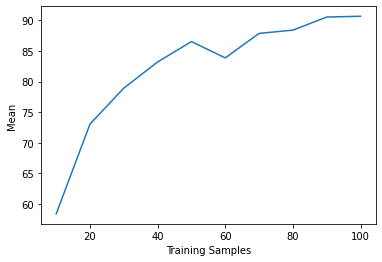

In [ ]:
plt.plot(percent_train,mean_list)
plt.xlabel("Training Samples")
plt.ylabel("Mean")
plt.show()

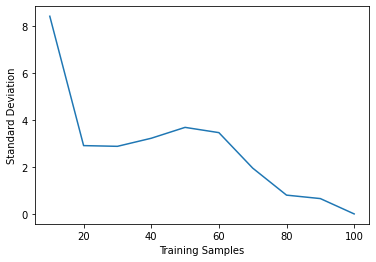

In [ ]:
plt.plot(percent_train,std_list)
plt.xlabel("Training Samples")
plt.ylabel("Standard Deviation")
plt.show()

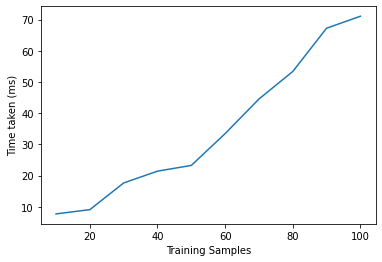

In [ ]:
plt.plot(percent_train,time_list)
plt.xlabel("Training Samples")
plt.ylabel("Time taken (ms)")
plt.show()